# Simple Portfolio Analysis Project

This project uses returns data from last year (Feb 17 2023 - Feb 15 2024) of three equities Google (GOOGL), Bank of America (BAC) and Delta Air Lines (DAL)

## Objectives
- Compute Sharpe ratio of each asset
- Compute covariance of assets
- Compute portfolio return and volatility of equal weight portfolio

In [16]:
import numpy as np
import pandas as pd
import seaborn as sb

## Compute Sharpe Ratio

Sharpe Ratio is the excess return (return minus return of risk free rate) of an investment over it's volatility (standard deviation)

$$
  Sharpe Ratio(P) = \frac{R_p - R_f}{\sigma_p}
$$

In [80]:
returns = pd.read_csv('../gh_data/returns_data.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [81]:
returns.head()

,DAL Returns,BAC Returns,GOOGL Returns
Date,,,
2023-02-17,0.002090,0.001984,-0.012145
2023-02-21,-0.032847,-0.023479,-0.027133
2023-02-22,-0.002426,-0.006663,-0.001525
2023-02-23,0.014050,-0.000875,-0.008292
2023-02-24,-0.004530,-0.001459,-0.019364


In [82]:
returns.columns = ['DAL','BAC','GOOGL']

[Text(0.5, 0, 'Daily Returns %'),
 Text(0.5, 1.0, 'Histogram Showing Historical % Daily Returns Of Tickers DAL, BAC and GOOGL')]

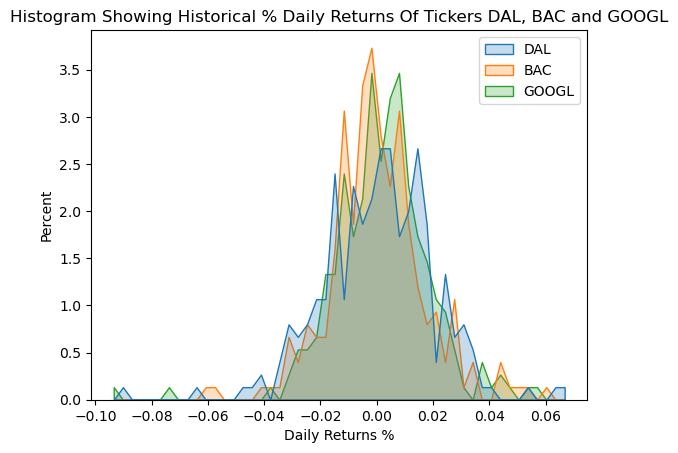

In [83]:
ax = sb.histplot(returns, stat="percent", bins=50, element="poly")
ax.set(xlabel="Daily Returns %", title="Histogram Showing Historical % Daily Returns Of Tickers DAL, BAC and GOOGL")

### Steps
- Define number of trading days in year and annual risk free rate
- Compute risk free rate per period (days in this case)
- Compute excess daily returns
- Compute annual returns by raising cumulative return to the power of periods in year divided by number of periods
- Compute annual volatility by multiplying standard deviation by square root of the number of periods in a year
- Compute Sharpe ratio

In [118]:
days_in_year = 252
risk_free_rate = 0.05

rfr_per_day = (1+risk_free_rate) ** (1/days_in_year)-1

print("An annual risk free rate of {} translates to a daily risk free rate of {}".format(risk_free_rate, rfr_per_day))

An annual risk free rate of 0.05 translates to a daily risk free rate of 0.00019363050654397362


In [119]:
excess_return = returns - rfr_per_day
excess_return.head()

,DAL,BAC,GOOGL
Date,,,
2023-02-17,0.001896,0.001791,-0.012339
2023-02-21,-0.033040,-0.023673,-0.027327
2023-02-22,-0.002620,-0.006856,-0.001719
2023-02-23,0.013857,-0.001069,-0.008486
2023-02-24,-0.004723,-0.001653,-0.019558


In [120]:
excess_return_compounded = (1+excess_return).prod()
n_periods = excess_return.shape[0]
excess_return_ann = excess_return_compounded ** (days_in_year/n_periods)-1
excess_return_ann

DAL      0.025655
BAC     -0.051695
GOOGL    0.428309
dtype: float64

In [121]:
vol_ann = returns.std()*np.sqrt(days_in_year)
vol_ann

DAL      0.312800
BAC      0.272273
GOOGL    0.275536
dtype: float64

In [122]:
sharpe_ratio = excess_return_ann/vol_ann
sharpe_ratio

DAL      0.082016
BAC     -0.189864
GOOGL    1.554460
dtype: float64

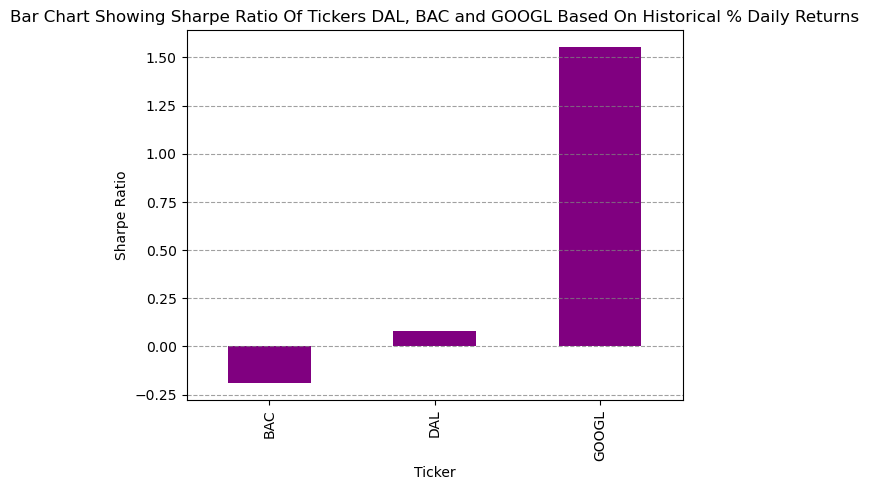

In [124]:
ax = sharpe_ratio.sort_values().plot.bar(title="Bar Chart Showing Sharpe Ratio Of Tickers DAL, BAC and GOOGL Based On Historical % Daily Returns", ylabel="Sharpe Ratio",
                                         xlabel="Ticker", color="purple")

ax.yaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.75)

## Compute Covariance Of Assets

In [125]:
cov = returns.cov()
cov

,DAL,BAC,GOOGL
DAL,0.000388,0.000176,0.000049
BAC,0.000176,0.000294,0.000033
GOOGL,0.000049,0.000033,0.000301


<Axes: >

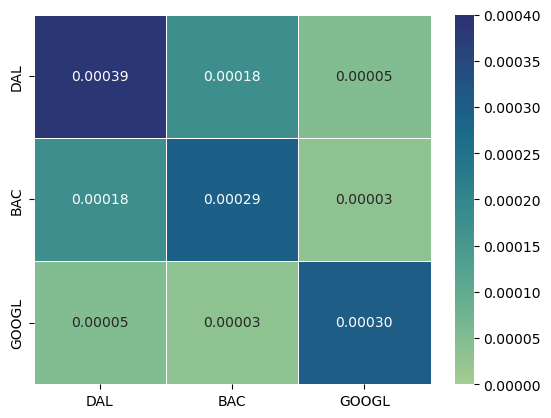

In [126]:
sb.heatmap(cov, annot=True, fmt=".5f", linewidth=.5, cmap="crest", vmin=0, vmax=0.0004)

## Compute Portfolio Return and Volatility of Equal Weight Portfolio

In [127]:
equal_weights = np.repeat(1/3, 3)
equal_weights

array([0.33333333, 0.33333333, 0.33333333])

In [115]:
returns_compounded = (1+returns).prod()
n_periods = returns.shape[0]
returns_ann = returns_compounded ** (days_in_year/n_periods) - 1
returns_ann

DAL      0.076942
BAC     -0.004262
GOOGL    0.499632
dtype: float64

In [116]:
portfolio_returns = equal_weights.T @ returns_ann
portfolio_returns

0.19077084631444152

In [128]:
portfolio_vol = np.sqrt(equal_weights.T @ cov @ equal_weights)
portfolio_vol_ann = portfolio_vol * np.sqrt(days_in_year)
portfolio_vol_ann

0.20485518044883116